< GRUPO 7 >

PILAR ARIAS, ÁLVARO GARCÍA CID, YEDRA MARTÍN, AMAYA SARASA

# INSTALAMOS LA LIBRERÍA DEAP

In [1]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 15.2 MB/s 


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 615 kB 15.5 MB/s 
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78119 sha256=300f5828dc91f16b8df0238e5d152b5c6fa640629826aba3f35bfb09829e681d
  Stored in directory: /root/.cache/pip/wheels/06/d1/b8/b4495d80f3aa67a67b8d19a900892d4f6af3c6d1bdd3cd015c
Successfully built scoop


In [6]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

In [7]:
# Importamos la librería
import random
# Fijamos la semilla. Si no cambiamos la semilla, 
# la función generará los mismos número aleatorios
random.seed(0)
# Generamos los números pseudo-aleatorios en 2 list comprenhension
# para encapsular todos los datos en las listas x e y
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


In [8]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

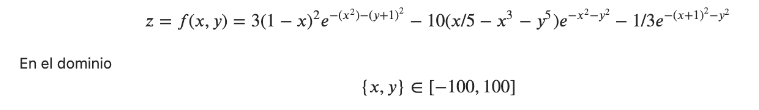

Para poder introducir correctamente esta función, se ha partido en diferentes segmentos para su correcta ejecución.

In [9]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res1 = (1-x[0])**2
    res2 = np.exp(-(x[0]**2+(x[1]+1)**2))
    res3 = x[0]/5-x[0]**3-x[1]**5
    res4 = np.exp(-(x[0]**2)-(x[1]**2))
    res5 = (1/3)*np.exp(-((x[0]+1)**2)-x[1]**2)
    res = 3* res1 * res2 - 10 * res3 * res4 - res5
    return res

Generamos vectores para comenzar la exploración del máximo de la función.

In [10]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
# print('x= ', x)
# print('y= ', y)

In [11]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Representamos la función para orientarnos sobre dónde estará ese máximo global que se está buscando.

Text(0.5, 0, 'f(x,y)')

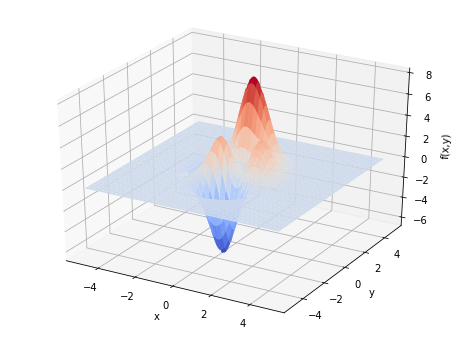

In [12]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

In [13]:
import random
from deap import base
from deap import creator
from deap import tools

In [14]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [15]:
creator.create("Individual", list, fitness=creator.FitnessMax)

In [16]:
toolbox = base.Toolbox()

In [17]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

In [18]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

-37.970486136133474

In [19]:
# Generación de inviduos
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [20]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[45.96634965202574, 79.7676575935987]

In [21]:
individuo.fitness.values

()

In [22]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 100)

In [23]:
poblacion = toolbox.population()
print(poblacion)

[[36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885925, -83.91083628949292], [-35.98907906549084, 1.5881285041147777], [86.56676484538136, -78.18843081377926], [10.253449218110248, 41.312281973377935], [9.488182265684756, 62.8933726582672], [8.056721394064795, 92.76770919476019], [20.63712559227659, 17.52341283508727], [-11.00219474489677, 19.257372316621257], [-23.019770805467914, 15.130202832977702], [-41.934099519448395, -62.121734289128774], [-62.654094

In [24]:
poblacion[0]

[36.79678638308826, -5.571456909457325]

In [25]:
poblacion[0].fitness.values

()

In [26]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res1 = (1-x[0])**2
    res2 = np.exp(-(x[0]**2+(x[1]+1)**2))
    res3 = x[0]/5-x[0]**3-x[1]**5
    res4 = np.exp(-(x[0]**2)-(x[1]**2))
    res5 = (1/3)*np.exp(-((x[0]+1)**2)-x[1]**2)
    res = 3* res1 * res2 - 10 * res3 * res4 - res5
    return res,


In [27]:
toolbox.register("evaluate", funcion_objetivo)

Comprobamos el individuo generado

In [28]:
individuo

[45.96634965202574, 79.7676575935987]

In [29]:
funcion_objetivo(individuo)

(0.0,)

In [30]:
# Ejemplo de uso 2
toolbox.evaluate(individuo)

(0.0,)

## Único punto de cruce 

In [31]:
# Registro de operacion genética de cruce
toolbox.register("mate", tools.cxOnePoint)
#toolbox.register("mate", tools.cxTwoPoint)
#toolbox.register("mate", tools.cxUniform)

In [32]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [33]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [34]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [35]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

<ipython-input-34-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01      	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	1.293

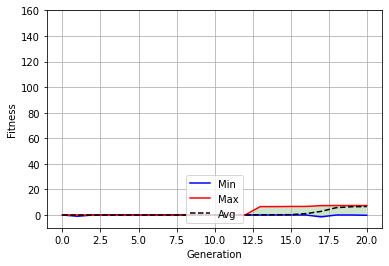

In [36]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

## Cruce con dos puntos

In [37]:
# Registro de operacion genética de cruce
#toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mate", tools.cxTwoPoint)
#toolbox.register("mate", tools.cxUniform)

In [38]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [39]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [40]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [41]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

<ipython-input-40-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	55    	9.69215e-50	4.2247e-49 	-5.6445e-140	1.93843e-48
2  	54    	-2.77757e-10	2.76365e-09	-2.77757e-08	9.62191e-38
3  	54    	1.39112e-25 	1.38414e-24	0           	1.39112e-23
4  	43    	-2.77757e-10	2.76365e-09	-2.77757e-08	1.39112e-23
5  	61    	9.2011e-15  	6.63727e-14	0           	5.84792e-13
6  	64    	-8.5687e-05 	0.000852575	-0.0085687  	5.84792e-13
7  	61    	0.00101441  	0.0100932  	4.41527e-65 	0.101441   
8  	51    	0.0653251   	0.617144   	-6.94448e-08	6.20338    
9  	55    	0.197282    	1.05693    	-6.23852e-14	6.20338    
10 	58    	0.617602    	1.87859    	-2.43588    	6.20338    
11 	59    	1.79351     	2.75949    	-9.91273e-17	6.20338    
12 	52    	4.34659     	2.78739    	-0.491237   	6.20338    
13 	66    	5.90065     	1.27026    	9.62e-33    	6.20338    
14 	60    	5.84401     	1.62766    	-4.9379     	6.20338    
15 	65    	5.86283     	1.5

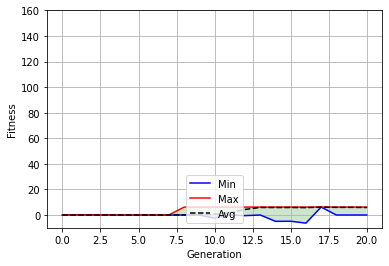

In [42]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

## Cruce uniforme

Ahora probaremos lo mismo que antes, pero con un cruce uniforme. Los atributos se intercamnain según la probabilidad indpb, que en este caso, le hemos dado el valor de 0.4

In [52]:
toolbox.register("mate", tools.cxUniform, indpb=0.4)

In [44]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [45]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [48]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [46]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

<ipython-input-48-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	48    	1.16306e-49	4.60351e-49	0           	1.93843e-48
2  	58    	9.62191e-40	9.57368e-39	0           	9.62191e-38
3  	57    	-5.55514e-10	3.8886e-09 	-2.77757e-08	1.39112e-23
4  	57    	2.79554e-25 	1.94742e-24	-6.09907e-315	1.39112e-23
5  	53    	1.30985e-21 	1.30258e-20	5.60587e-55  	1.30915e-19
6  	66    	1.11778e-14 	7.83305e-14	1.93843e-48  	5.84792e-13
7  	58    	4.11695e-12 	4.03913e-11	-1.87111e-79 	4.06002e-10
8  	61    	4.25384e-12 	4.03781e-11	-2.42373e-67 	4.06002e-10
9  	60    	0.000149047 	0.00144547 	3.45627e-29  	0.0145264  
10 	59    	-0.0581074  	0.579672   	-5.82576     	0.0145264  
11 	63    	0.000155236 	0.00144539 	-1.74298e-07 	0.0145264  
12 	60    	0.000594758 	0.00285441 	5.90313e-47  	0.0147269  
13 	59    	0.0453987   	0.437585   	-1.74298e-07 	4.39911    
14 	55    	0.153505    	0.977698   	-4.34561     	4.39911    
15 	67    	0.3482

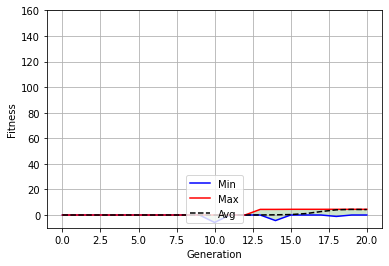

In [53]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)